In [3]:
# imports
import numpy as np
from scipy.integrate import ode
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.gridspec as gridspec

from mpl_toolkits.basemap import Basemap

import gzip
import pickle

In [76]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

<IPython.core.display.Javascript object>


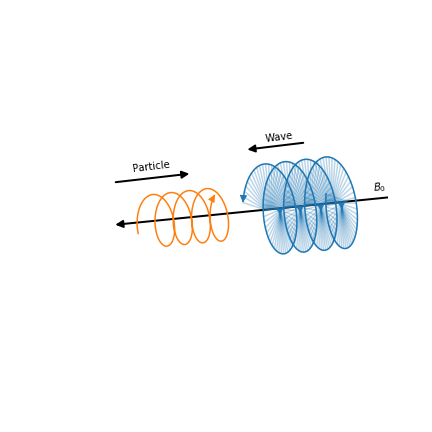

In [187]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 5 
fig_height = 5
fig_size =  [fig_width+1,fig_height+1]
params = {'font.family': 'Sans Serif',
          'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

tvec = np.linspace(-1,1,1000)
stickvec = np.linspace(-1,1,200)

vel = 1.
w = 4.*np.pi
w2 = 4.2*np.pi

wpos = np.array([vel*tvec, np.cos(w*tvec), np.sin(-w*tvec)])
ppos = np.array([3 - vel*tvec, 0.6*np.cos(w2*tvec), 0.6*np.sin(w2*tvec)])

Bpos = np.array([np.linspace(-5,5, len(tvec)), np.zeros_like(tvec), np.zeros_like(tvec)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(wpos[0,0:-2],wpos[1,0:-2], wpos[2,0:-2], color=plt.cm.Vega10(0))


for s in stickvec:
    ax.plot([vel*s, vel*s],[0, np.cos(w*s)], [0, -np.sin(w*s)],'r', alpha=0.3, color=plt.cm.Vega10(0))



ax.plot(ppos[0,0:-2],ppos[1,0:-2], ppos[2,0:-2],color=plt.cm.Vega10(1))
# ax.plot(Bpos[0,0:-2],Bpos[1,0:-2], Bpos[2,0:-2], color='k', linewidth=2, zorder=0)

ax.view_init(-10, 120)
ax.set_xlim([0, 4])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_aspect('equal')
ax.set_axis_off()

a = Arrow3D([wpos[0,-2],wpos[0,-1]],
            [wpos[1,-2],wpos[1,-1]],
            [wpos[2,-2],wpos[2,-1]],
            mutation_scale=15, lw=1, arrowstyle="-|>", color=plt.cm.Vega10(0))
ax.add_artist(a)

b = Arrow3D([ppos[0,-2],ppos[0,-1]],
            [ppos[1,-2],ppos[1,-1]],
            [ppos[2,-2],ppos[2,-1]],
            mutation_scale=15, lw=1, arrowstyle="-|>", color=plt.cm.Vega10(1))
ax.add_artist(b)

c = Arrow3D([Bpos[0,0],Bpos[0,-1]],
            [Bpos[1,0],Bpos[1,-1]],
            [Bpos[2,0],Bpos[2,-1]],
            mutation_scale=15, lw=2, arrowstyle="-|>", color='k')
ax.add_artist(c)



# annotation lines:
c = Arrow3D([5, 2.9],
            [0, 0],
            [1, 1],
            mutation_scale=15, lw=2, arrowstyle="-|>", color='k')
ax.add_artist(c)
ax.text(4.5,0,1.3,'Particle', zdir=(1,0,0))

c = Arrow3D([0, 1.5],
            [0, 0],
            [1.4, 1.4],
            mutation_scale=15, lw=2, arrowstyle="-|>", color='k')
ax.add_artist(c)

ax.text(1,0,1.6,'Wave', zdir=(1,0,0))

ax.text(-1.6,0,0.2,'$B_0$', zdir=(1,0,0))

# fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.savefig('resonant_thing.pdf', bbox_inches=0)


# (You'll have to crop this manually since the view window is always square for 3d)

In [159]:
fig.savefig?